# **Analyzing GPA Trends at UIUC** 📊

<hr style="color: #DD3403;">

## **Step 1: Data Loading and Initial Exploration**
In this step, we will load the GPA dataset into a Pandas DataFrame and perform an initial exploration to understand its structure, key features, and any potential data cleaning requirements.

In [2]:
import pandas as pd
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/gpa.csv")
df

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Primary Instructor,Students
0,2024,Winter,2024-wi,ADV,150,Introduction to Advertising,ONL,22,18,1,...,0,0,0,0,0,0,0,0,"Hall, Steven R",42
1,2024,Winter,2024-wi,AFRO,100,Intro to African American St,ONL,5,8,6,...,0,1,1,0,0,0,1,0,"McMillion, Desiree Y",25
2,2024,Winter,2024-wi,ASTR,330,Extraterrestrial Life,ONL,1,16,8,...,1,0,2,0,1,0,0,0,"Dunne, Bryan C",37
3,2024,Winter,2024-wi,ATMS,120,Severe and Hazardous Weather,ONL,3,16,3,...,2,2,1,1,1,1,2,0,"Choate, Jessica J",46
4,2024,Winter,2024-wi,BADM,275,Operations Management,ONL,0,49,17,...,2,3,0,0,0,0,0,0,"Hu, Junqi",81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69107,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,0,1,3,0,0,0,2,1,"Stepanov, Alexei G",31
69108,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,0,"Unger, David",28
69109,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,5,1,1,0,2,0,1,0,"Morgan, William T",28
69110,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,3,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie",21


### **Step 1.1: Creating the 'Average GPA' Column**
Each row in the dataset represents a specific course section at UIUC. To facilitate our exploratory data analysis, we need to introduce a new column, Average GPA, which will allow us to analyze grading patterns across different courses.

To compute this column, we will calculate the weighted average GPA for each course section by considering:

The number of students who received each letter grade.
The grade point value assigned to each letter grade (based on the Illinois Registrar).
By implementing this calculation, we will obtain a more accurate representation of how grading distributions vary across different courses and departments.

In [4]:
df["Average GPA"] = df["A+"] * 4.0 + df["A"] * 4.0 + df["A-"] * 3.67 + df["B+"] * 3.33 + df["B"] * 3.0 + df["B-"] * 2.67 + df["C+"] * 2.33 + df["C"] * 2.0 + df["C-"] * 1.67 + df["D+"] * 1.33 + df["D"] * 1.0 + df["D-"] * 0.67 + df["F"] * 0
df["Average GPA"] = df["Average GPA"] / df["Students"]
df

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Primary Instructor,Students,Average GPA
0,2024,Winter,2024-wi,ADV,150,Introduction to Advertising,ONL,22,18,1,...,0,0,0,0,0,0,0,"Hall, Steven R",42,3.968333
1,2024,Winter,2024-wi,AFRO,100,Intro to African American St,ONL,5,8,6,...,1,1,0,0,0,1,0,"McMillion, Desiree Y",25,3.467600
2,2024,Winter,2024-wi,ASTR,330,Extraterrestrial Life,ONL,1,16,8,...,0,2,0,1,0,0,0,"Dunne, Bryan C",37,3.495946
3,2024,Winter,2024-wi,ATMS,120,Severe and Hazardous Weather,ONL,3,16,3,...,2,1,1,1,1,2,0,"Choate, Jessica J",46,3.108696
4,2024,Winter,2024-wi,BADM,275,Operations Management,ONL,0,49,17,...,3,0,0,0,0,0,0,"Hu, Junqi",81,3.712346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69107,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,1,3,0,0,0,2,1,"Stepanov, Alexei G",31,3.183226
69108,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,"Unger, David",28,3.774643
69109,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,1,1,0,2,0,1,0,"Morgan, William T",28,2.595714
69110,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie",21,2.603333


### **Step 1.2: Identifying the "Hardest" and "Easiest" Courses**
A common way to assess a course's difficulty is by analyzing its Average GPA. In this step, we will use the Average GPA column to identify:

The 50 courses with the lowest Average GPA, which we will store in the DataFrame df_hard.
The 50 courses with the highest Average GPA, which we will store in the DataFrame df_easy.
This analysis will help us understand grading trends and identify courses where students tend to perform exceptionally well or struggle the most.

In [6]:
df_hard = df.nsmallest(50, "Average GPA")
df_hard

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Primary Instructor,Students,Average GPA
9053,2022,Spring,2022-sp,GS,199,College Academic Success,LCD,1,0,0,...,2,0,2,1,2,12,0,"Walk, Aaron J",26,1.140385
27054,2018,Fall,2018-fa,LER,120,Contemporary Labor Problems,ONL,0,0,1,...,1,2,1,1,0,15,0,"Taylor, Don",28,1.142857
11058,2021,Fall,2021-fa,CLCV,100,Vocab Building-GRK & LAT Roots,ONL,2,0,3,...,1,0,1,2,3,20,0,"Augoustakis, Antonios",40,1.208750
39524,2016,Spring,2016-sp,LER,100,Introduction to Labor Studies,ONL,0,1,0,...,4,1,1,1,1,10,0,"Hawking, Carol J",24,1.319583
47323,2014,Fall,2014-fa,LER,120,Contemporary Labor Problems,ONL,0,4,0,...,4,1,0,1,0,15,1,"Hershfield, David",30,1.400000
12160,2021,Fall,2021-fa,LER,100,Introduction to Labor Studies,ONL,0,1,0,...,3,0,2,0,1,11,0,"Ashby, Steven",26,1.410385
49591,2014,Spring,2014-sp,LER,120,Contemporary Labor Problems,ONL,0,1,3,...,3,0,0,0,2,11,0,"Cohen, Margaret L",25,1.427600
52380,2013,Fall,2013-fa,MATH,2,Introductory Algebra,LCD,0,0,0,...,10,5,3,3,2,5,3,"Aydin-Mullen, Yelda",31,1.430645
49666,2014,Spring,2014-sp,MATH,220,Calculus,LBD,0,3,0,...,5,0,2,1,0,11,1,"Gilbert, Rebekah A",28,1.476071
24326,2019,Spring,2019-sp,LER,100,Introduction to Labor Studies,ONL,0,2,1,...,0,0,0,2,1,9,0,"Cohen, Margaret L",21,1.491905


In [7]:
df_easy = df.nlargest(50, "Average GPA")
df_easy

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Primary Instructor,Students,Average GPA
25230,2019,Summer,2019-su,IS,532,Theory & Pract Data Cleaning,ONL,266,18,1,...,0,0,0,0,0,0,0,"Ludaescher, Bertram",286,3.995350
15304,2021,Summer,2021-su,IS,537,Theory & Prct of Data Cleaning,ONL,407,9,0,...,0,0,0,0,0,0,0,NaN,419,3.995203
7310,2022,Fall,2022-fa,MUSC,487,Marching Illini,PR,0,289,0,...,0,0,0,0,0,0,1,"Houser, Barry L",291,3.993127
38182,2016,Spring,2016-sp,ACCY,398,Practical Problems in Atg,ONL,139,1,0,...,0,0,0,0,0,0,0,"Nekrasz, Frank",141,3.992908
34099,2017,Spring,2017-sp,EPSY,490,Prep for Recruitment Counselor,NaN,69,14,0,...,0,0,0,0,0,0,0,"Brown, Dawn M",84,3.992024
47603,2014,Fall,2014-fa,ME,199,Automotive Design Projects,LBD,8,111,0,...,0,0,0,0,0,0,0,"Philpott, Michael L",120,3.991667
35685,2016,Fall,2016-fa,ANSC,103,Working With Farm Animals,NaN,0,79,0,...,0,0,0,0,0,0,0,"Cobb, Alan R",80,3.991625
40650,2015,Fall,2015-fa,ANSC,103,Working With Farm Animals,LEC,0,76,0,...,0,0,0,0,0,0,0,"Cobb, Alan R",77,3.991299
10117,2022,Spring,2022-sp,VCM,673,Companion Animal Rehab,LCD,69,2,0,...,0,0,0,0,0,0,0,"Knap, Kimberly E",72,3.990694
57664,2012,Fall,2012-fa,MUS,273,Marching Illini,PR,0,308,0,...,0,0,0,0,0,0,0,"Houser, Barry L",311,3.990354


### **Step 1.3: Analyzing Course Levels for Hardest and Easiest Courses**  

To further explore course difficulty, we will analyze the **average course number** for both the hardest and easiest courses. Using our previously created DataFrames (`df_hard` and `df_easy`), we will calculate:  
- The **mean course number** for the **50 hardest courses**, stored in **`hard_avg`**.  
- The **mean course number** for the **50 easiest courses**, stored in **`easy_avg`**.  

This will help determine whether lower-level or higher-level courses tend to have stricter or more lenient grading patterns.

In [8]:
hard_avg = df_hard["Number"].mean()
hard_avg

np.float64(167.22)

In [9]:
easy_avg = df_easy["Number"].mean()
easy_avg

np.float64(372.96)

### **Step 1.4: Analyzing the "Hardest" and "Easiest" Courses**  

#### **Evaluating Course Difficulty Based on Course Number**  

After analyzing course GPAs, a common assumption is that **higher-numbered courses (300-400 level)** are the most challenging since they typically indicate junior- and senior-level coursework. However, our data suggests that these courses may not necessarily have the **lowest Average GPAs** at UIUC.  

Several factors could explain this trend:  

1. **Prerequisite Knowledge**  
   - Students in higher-level courses have **already completed foundational coursework**, equipping them with the necessary skills to succeed.  
   - As a result, they may perform better, leading to higher GPAs compared to introductory courses.  

2. **Course Selection Bias**  
   - Upper-level courses are often taken by students who **specialize in a subject**, meaning they are **more prepared and motivated**, which can result in higher average GPAs.  
   - In contrast, lower-level courses may include students from various disciplines, some of whom may struggle with unfamiliar material.  

3. **Grading Policies and Course Structure**  
   - Some introductory courses (**100-200 level**) are designed to be more rigorous, serving as **"weed-out" courses** for certain majors.  
   - Upper-level courses, while more advanced, may have **smaller class sizes, more project-based learning, and flexible grading structures**, which can positively impact GPA.  

#### **Conclusion**  
While course numbers **generally** indicate the level of difficulty in terms of content, they do not always correlate with **lower GPAs**. The data suggests that **introductory courses may have lower GPAs due to a wider range of student preparedness**, while upper-level courses tend to have **higher GPAs due to student selection and experience**.

<hr style="color: #DD3403;">

# **Step 2: Analyzing GPA by Subject**
So far, we have explored overall GPA trends, but now we will investigate differences in GPA across subjects. By grouping data at the subject level, we can identify patterns in grading distributions and determine which subjects tend to have higher or lower average GPAs.

### **Step 2.1: Exploring GPA Trends Across Subjects**  

In this step, we will create a new DataFrame, **`df_subject`**, to aggregate grading data at the **subject level**. This DataFrame will include:  
- A **single row for each subject**, summarizing overall grading trends.


- Each **letter grade column** will represent the **total number of students** who received that grade across all courses within the subject.  

To ensure consistency and facilitate analysis, the final DataFrame will include only **numeric columns**, allowing us to efficiently compare grading distributions across different subjects.

In [11]:
df_subject = df.groupby("Subject").agg("sum", numeric_only=True).reset_index()
df_subject

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,AAS,494134,30940,1050,2829,1053,658,644,308,165,169,70,39,44,26,132,26,7187,859.495654
1,ABE,334747,55405,584,3332,912,830,987,260,148,194,50,21,52,9,74,19,7453,584.234785
2,ACCY,5737609,1079894,15871,36922,21865,19613,18654,7728,3912,3196,1579,439,876,294,953,363,131902,9688.130625
3,ACE,2290983,320492,8769,19270,6845,5559,9093,3328,2156,3124,1032,497,882,294,993,152,61842,3761.774442
4,ACES,383227,22012,1612,2095,393,197,316,87,92,94,40,25,34,19,94,10,5098,698.842235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,UP,729992,128783,1483,4977,2508,1437,1509,591,317,339,161,51,103,71,248,39,13795,1270.733115
170,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,13.974534
171,VCM,110864,34284,547,1687,35,63,1087,20,23,349,1,1,40,0,7,2,3860,196.410821
172,VM,258207,78366,0,2879,8,0,7981,1,0,4725,0,0,554,0,21,10,16169,362.899891


### **Step 2.2: Correcting the `Average GPA` Column**  

Upon reviewing `df_subject`, we may notice that some columns, such as **`Year` and `Average GPA`**, contain incorrect values due to how the data was grouped. Specifically, since we aggregated **total student counts** by grade, the existing `Average GPA` values are inaccurate.  

To correct this, we will **redefine the `Average GPA` column** by calculating a **weighted average GPA** for each subject. This will account for the **number of students** who received each letter grade, ensuring a more accurate representation of grading patterns across subjects.

In [13]:
df_subject["Average GPA"] = df_subject["A+"] * 4.0 + df_subject["A"] * 4.0 + df_subject["A-"] * 3.67 + df_subject["B+"] * 3.33 + df_subject["B"] * 3.0 + df_subject["B-"] * 2.67 + df_subject["C+"] * 2.33 + df_subject["C"] * 2.0 + df_subject["C-"] * 1.67 + df_subject["D+"] * 1.33 + df_subject["D"] * 1.0 + df_subject["D-"] * 0.67 + df_subject["F"] * 0
df_subject["Average GPA"] = df_subject["Average GPA"] / df_subject["Students"]
df_subject


,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,AAS,494134,30940,1050,2829,1053,658,644,308,165,169,70,39,44,26,132,26,7187,3.517274
1,ABE,334747,55405,584,3332,912,830,987,260,148,194,50,21,52,9,74,19,7453,3.533133
2,ACCY,5737609,1079894,15871,36922,21865,19613,18654,7728,3912,3196,1579,439,876,294,953,363,131902,3.435311
3,ACE,2290983,320492,8769,19270,6845,5559,9093,3328,2156,3124,1032,497,882,294,993,152,61842,3.342199
4,ACES,383227,22012,1612,2095,393,197,316,87,92,94,40,25,34,19,94,10,5098,3.659425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,UP,729992,128783,1483,4977,2508,1437,1509,591,317,339,161,51,103,71,248,39,13795,3.467809
170,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,3.448760
171,VCM,110864,34284,547,1687,35,63,1087,20,23,349,1,1,40,0,7,2,3860,3.467158
172,VM,258207,78366,0,2879,8,0,7981,1,0,4725,0,0,554,0,21,10,16169,2.813719


### **Step 2.3: Identifying the "Hardest" and "Easiest" Subjects**  

A common way to evaluate a subject's difficulty is by analyzing its **Average GPA**. In this step, we will use the `Average GPA` column in `df_subject` to determine:  
- The **10 subjects with the lowest** Average GPA, stored in the DataFrame **`hard_subjects`**.  
- The **10 subjects with the highest** Average GPA, stored in the DataFrame **`easy_subjects`**.  

This analysis will provide insights into which subjects tend to have stricter grading and which ones typically result in higher student performance.

In [15]:
hard_subjects = df_subject.nsmallest (10, "Average GPA")
hard_subjects

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
172,VM,258207,78366,0,2879,8,0,7981,1,0,4725,0,0,554,0,21,10,16169,2.813719
116,MATH,5397267,832939,17421,41455,24395,24080,30581,18419,15424,18005,9452,5305,6649,2814,8829,1708,222829,2.914632
163,TAM,756169,116920,2781,6258,4630,4418,5187,3370,2647,2782,1606,981,1141,532,1278,177,37611,2.914962
149,SAME,6039,437,2,29,30,20,31,12,14,17,5,2,2,3,5,1,172,2.949884
134,PHYS,2068965,296574,18974,20537,13762,12745,13086,11715,9543,9335,6985,4361,3172,3644,2021,797,129880,2.968218
108,LAT,10065,510,13,18,15,12,18,6,11,5,2,1,2,1,7,0,111,2.990991
40,CHBE,683827,142076,996,4646,2512,2389,4050,1933,1493,2406,867,179,409,78,310,86,22268,3.030871
41,CHEM,3864516,374605,20644,56056,23207,21953,28416,16803,15106,17592,9803,4843,4997,2729,5250,1431,227399,3.057198
133,PHIL,1177027,102123,1099,4656,3616,2922,2860,1756,955,830,483,213,286,216,949,132,20841,3.104231
118,MCB,4862019,614869,10349,18085,14739,13683,15368,9293,6767,6117,3494,2052,1612,929,1460,436,103948,3.108367


In [16]:
easy_subjects = df_subject.nlargest (10, "Average GPA")
easy_subjects

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
125,MUSC,93024,21812,250,2551,58,28,55,9,2,14,2,0,5,0,15,4,2989,3.927779
38,CB,4022,1250,0,140,0,0,17,0,0,1,0,0,0,0,0,2,158,3.879747
37,BUS,869655,62697,1906,10153,1507,652,400,121,58,55,17,17,21,12,42,15,14961,3.862449
68,ERAM,18201,5072,63,138,40,13,9,1,1,0,0,0,1,0,0,0,266,3.861241
127,NE,2023,100,15,4,6,2,1,0,0,0,0,0,0,0,0,0,28,3.845714
168,UKR,10070,565,10,206,46,21,9,4,0,1,0,0,0,1,0,2,298,3.835906
44,CHP,44439,4575,210,299,52,17,24,4,2,6,1,1,0,0,6,1,622,3.835675
141,REES,6047,603,32,34,7,2,5,2,0,0,0,0,1,0,0,0,83,3.827590
65,EPOL,216332,50302,506,2821,394,144,99,39,21,23,12,2,15,1,58,9,4135,3.813284
64,EOL,116933,31442,93,1340,264,123,100,12,4,9,0,0,6,0,10,3,1961,3.812254


### **Step 2.4: Analyzing the "Hardest" and "Easiest" Subjects**  

After identifying subjects with the highest and lowest **Average GPAs**, we need to assess whether these subjects are truly the most difficult or easiest at Illinois.  

#### **Evaluating Subject Difficulty**  
While GPA provides a useful metric, it may not fully capture a subject's actual difficulty due to several influencing factors:  

- **Grading Policies:** Some departments have stricter or more lenient grading practices, which can skew GPA distributions.  


- **Student Background:** Advanced courses may attract students who are well-prepared, leading to higher GPAs despite challenging material.  


- **Course Enrollment Size:** Subjects with fewer course offerings or smaller student populations may have GPA fluctuations that do not reflect overall difficulty.  


- **Instructor Influence & Curving:** Differences in teaching styles, grading curves, and exam difficulty may impact a subject’s average GPA.  

#### **Conclusion**  
While GPA trends offer valuable insights, they do not necessarily define a subject's true difficulty. A more comprehensive assessment should consider **student workload, course structure, and grading policies** alongside GPA trends.

### **Step 2.5: Visualizing GPA Distribution Across Subjects**  

Now that we have calculated the **Average GPA** for each subject, we can use **data visualization** to better understand the overall grading patterns across all subjects.  

To achieve this, we will generate a **histogram** of the **Average GPA** using `df_subject`. This visualization will help us identify:  
- The distribution of GPAs across subjects.  
- Whether most subjects have **higher or lower** average GPAs.  
- Potential outliers or anomalies in grading trends.  

To ensure clarity, we will properly **label the x-axis and y-axis**, making the chart easy to interpret.

<Axes: xlabel='Average GPA', ylabel='Frequency'>

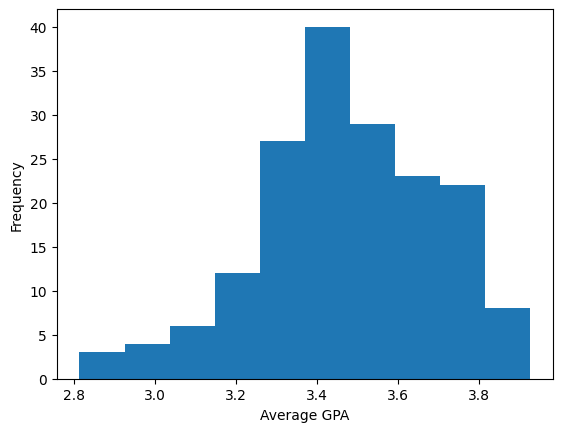

In [21]:
df_hist = df_subject["Average GPA"].plot.hist(xlabel = "Average GPA", ylabel = "Frequency")
df_hist

### **Step 2.6: Interpreting the GPA Distribution**  

By analyzing the histogram of **Average GPA across subjects**, we can estimate the general grading trends at UIUC.  

#### **Estimating the Average GPA Across Subjects**  
From the histogram, we observe that most subjects tend to cluster around a certain GPA range. While there is some variation, a reasonable estimate of the **typical Average GPA across subjects** appears to be **around 3.4**.  

This suggests that, on average, most subjects at UIUC have grading distributions where students tend to perform in the **B+ to A- range**. However, some subjects may have notably higher or lower averages due to factors such as **grading policies, course difficulty, and student performance**.


<hr style="color: #DD3403;">

## **Step 3: Analyzing GPA Trends Over Time**  

So far, we have explored GPA distributions across all courses and grouped them by **subject**. However, the dataset spans multiple years, with course data dating back to **2010**.  

To understand how grading trends have evolved over time, we will analyze **GPA changes across different years**. Some key questions we aim to explore include:  

- Has the **average GPA increased** over time, possibly indicating grade inflation or easier courses? 


- Has the **average GPA decreased** due to stricter grading policies?  


- How did GPA trends shift in **2019-2020**, particularly during the height of the COVID-19 pandemic?  


By examining these trends, we can gain insights into potential long-term changes in grading practices at UIUC.

### **Step 3.1: Analyzing GPA Trends by Year**  

To examine how grading patterns have changed over time, we will create a new DataFrame called **`df_year`**, which will aggregate GPA data at the **yearly level**.  

In **`df_year`**, each row will represent a **single academic year**, and each **letter grade column** will display the **total number of students** who received that grade in that specific year.  

To ensure consistency and accuracy in our analysis, the final DataFrame will contain **only numeric columns**, allowing us to easily track GPA trends over time.

In [24]:
df_year = df.groupby("Year").sum(numeric_only=True).reset_index()
df_year

,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,2010,1493480,19355,77012,36814,30579,43517,17195,11604,15753,5812,2975,4438,1506,4511,1404,271071,17983.181282
1,2011,1435567,19569,75526,36462,30987,42453,16776,11351,15844,6243,2910,4513,1679,4751,1200,269064,17216.397879
2,2012,822949,11834,44738,20603,17041,22408,9485,6515,8221,3307,1690,2218,936,2681,626,151677,9532.509354
3,2013,1468576,22541,81114,37513,30624,40241,17471,11611,14875,6367,3103,4263,1851,4895,1072,276469,16764.437980
4,2014,1440554,25081,79289,36792,30749,38679,17724,11713,14802,6579,3252,4640,2073,5363,1292,276736,16367.567458
5,2015,1516560,29032,87101,39378,31895,40221,18172,12281,14891,6576,3550,4528,2050,5572,1317,295247,17371.653103
6,2016,1452803,29094,85548,37962,30278,37678,16759,11590,14199,6114,3333,4271,1964,5785,1254,284575,16591.965208
7,2017,1513420,34941,92166,38295,29889,37541,16494,11117,14270,6130,3254,4600,2014,6151,1289,296862,17119.212533
8,2018,1509424,40112,98711,39621,29546,35837,16123,10809,13421,5949,3339,4350,2042,6253,1131,306113,17005.301120
9,2019,1528969,41642,104139,40875,30890,37332,16680,11203,13623,6117,3283,4434,2212,6914,1146,319344,16983.843455


### **Step 3.2: Correcting the `Average GPA` Column by Year**  

After grouping the data by **year**, we may notice that some columns in **`df_year`** are not accurately calculated due to the aggregation method used.  

To correct this, we will **redefine the `Average GPA` column** by computing a **weighted average GPA** for each year. This calculation will take into account the **number of students** who received each letter grade in a given year, ensuring a more accurate representation of GPA trends over time.

In [30]:
df_year["Average GPA"] = (df_year["A+"] * 4.0 + df_year["A"] * 4.0 + df_year["A-"] * 3.67 + df_year["B+"] * 3.33 + df_year["B"] * 3.0 + df_year["B-"] * 2.67 + df_year["C+"] * 2.33 + df_year["C"] * 2.0 + df_year["C-"] * 1.67 + df_year["D+"] * 1.33 + df_year["D"] * 1.0 + df_year["D-"] * 0.67 + df_year["F"] * 0) / df_year["Students"]
df_year

,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Students,Average GPA
0,2010,1493480,19355,77012,36814,30579,43517,17195,11604,15753,5812,2975,4438,1506,4511,1404,271071,3.233537
1,2011,1435567,19569,75526,36462,30987,42453,16776,11351,15844,6243,2910,4513,1679,4751,1200,269064,3.224523
2,2012,822949,11834,44738,20603,17041,22408,9485,6515,8221,3307,1690,2218,936,2681,626,151677,3.253189
3,2013,1468576,22541,81114,37513,30624,40241,17471,11611,14875,6367,3103,4263,1851,4895,1072,276469,3.250664
4,2014,1440554,25081,79289,36792,30749,38679,17724,11713,14802,6579,3252,4640,2073,5363,1292,276736,3.239539
5,2015,1516560,29032,87101,39378,31895,40221,18172,12281,14891,6576,3550,4528,2050,5572,1317,295247,3.266565
6,2016,1452803,29094,85548,37962,30278,37678,16759,11590,14199,6114,3333,4271,1964,5785,1254,284575,3.275508
7,2017,1513420,34941,92166,38295,29889,37541,16494,11117,14270,6130,3254,4600,2014,6151,1289,296862,3.301601
8,2018,1509424,40112,98711,39621,29546,35837,16123,10809,13421,5949,3339,4350,2042,6253,1131,306113,3.337883
9,2019,1528969,41642,104139,40875,30890,37332,16680,11203,13623,6117,3283,4434,2212,6914,1146,319344,3.339275


### **Step 3.3: Visualizing GPA Trends Over Time**  

Now that we have calculated the **Average GPA** for each year, we can use **data visualization** to observe how GPA trends have evolved over time.  

To do this, we will generate a **line plot** using `df_year`, which will allow us to:  


- Identify long-term trends in grading practices.  


- Observe whether GPA has **increased, decreased, or remained stable** over the years.  


- Detect any notable changes, such as shifts in grading policies or external influences (e.g., COVID-19 impact in 2019-2020).  

To ensure clarity, we will properly **label the x-axis and y-axis**, making the visualization easy to interpret.

<Axes: title={'center': 'Average GPA Over Time'}, xlabel='Year', ylabel='Average GPA'>

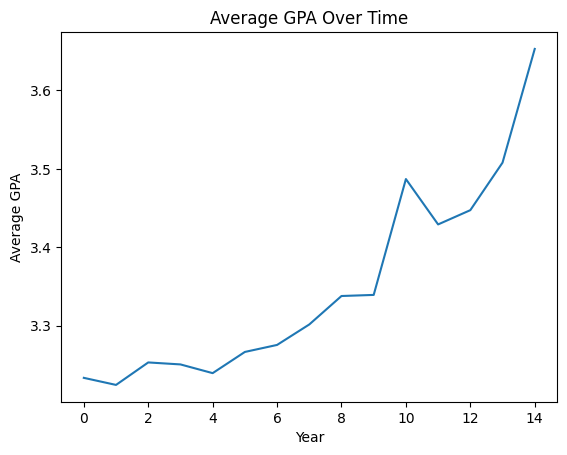

In [33]:
df_year["Average GPA"].plot(xlabel = "Year", ylabel = "Average GPA", title = "Average GPA Over Time")

### **Step 3.4: Analyzing GPA Trends Over Time**  

#### **Observations from the GPA Trend Line**  
From the plotted **Average GPA Over Time**, we observe a **consistent upward trend** in GPAs at UIUC. While there are minor fluctuations, the general pattern indicates a **gradual increase in Average GPA** over the years. A few key observations:  

1. **Early Years: Relatively Stable GPAs (Lower 3.3 Range)**  
   - In the earlier years, the **Average GPA remains relatively stable**, hovering around **3.2 to 3.3**. This suggests that grading policies may have been more consistent during this period.  

2. **Gradual Increase in GPA Over Time**  
   - Around the middle of the timeline, the Average GPA **starts increasing steadily**. This could indicate a **gradual shift in grading policies**, changes in student performance, or an increase in course flexibility.  

3. **Significant Spike in GPA (~Year 10-12)**  
   - There is a noticeable spike in GPA, followed by minor fluctuations before continuing the upward trend. This sharp rise around **2019-2020** aligns with the **COVID-19 pandemic**, during which many universities implemented **lenient grading policies** such as pass/fail options, adjusted assessments, and flexible grading curves.  

4. **Recent Years: Steady Climb Towards 3.6+**  
   - In the most recent years, **Average GPA has continued rising**, reaching above **3.6**. This could be due to **ongoing grade inflation**, improved student support systems, or adaptations in coursework that prioritize learning over strict grading.  

#### **Potential Factors Influencing GPA Increases**  
Several factors could have contributed to the overall **rise in GPAs**:  
- **Changes in grading policies** – More lenient grading over time.  
- **Improved academic resources** – Online learning tools, tutoring, and better course materials.  
- **COVID-19 impact** – Modified grading structures during remote learning.  
- **Evolving course assessments** – A shift from traditional exams to more flexible, project-based evaluations.  

#### **Conclusion**  
While it is clear that **GPAs have risen over time**, further analysis would be needed to determine whether this is due to **grade inflation, improved student performance, or changes in academic policies**. This trend aligns with national discussions on grading practices and student success in higher education.

<hr style="color: #DD3403;">